In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

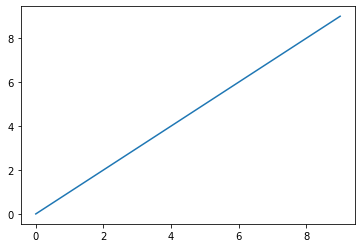

In [3]:
data = np.arange(10)
plt.plot(data)

### figure과 서브플롯 (subplot)

### ```fig = plt.figure()```
### ```fig.add_subplot(m, n, i)``` : m X n 크기의 i번째 subplot 생성 (AxesSubplot 객체)

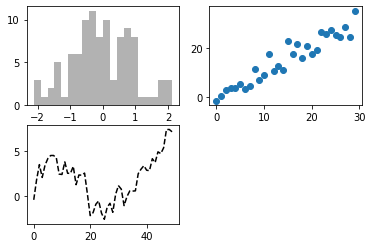

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

### ```plt.subplots(m, n)``` : m행, n열의 subplot 배열 생성

|  |  |
| -- | -- |
| nrows | 서브플롯의 행 수 |
| ncols | 서브플롯의 열 수 |
| sharex | 모든 서브플롯이 같은 x축 눈금을 사용하도록 한다 (xlim 값을 조절하면 모든 서브플롯에 적용) |
| sharey | 모든 서브플롯이 같은 y축 눈금을 사용하도록 한다 (ylim 값을 조절하면 모든 서브플롯에 적용) |
| subplot_kw | add_subplot을 사용해서 각 서브플롯을 생성할 때 사용할 키워드를 담고 있는 사전 |
| **fig_kw | figure를 생성할 때 사용할 추가적인 키워드 인자. (plt.subplots(2, 2, figsize = (8, 6)) |


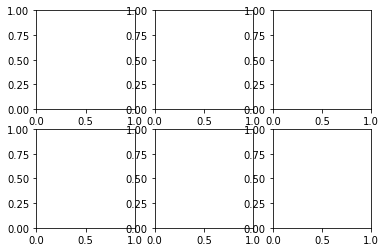

In [15]:
fig, axes = plt.subplots(2, 3)

- axes는 AxesSubplot 객체들의 배열

In [19]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

### 서브플롯 간 간격 조절
### ```plt.subplots_adjust(left, bottom, right, top, wspace, hspace)```
- wspace와 hspace는 서브플롯 간의 간격을 위해 각각 figure의 너비와 높이에 대한 비율을 조절

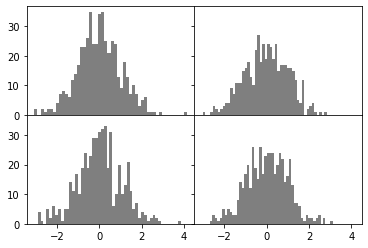

In [18]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5)
plt.subplots_adjust(wspace = 0, hspace = 0)

### 색상, 마커, 선 스타일

In [20]:
from numpy.random import randn

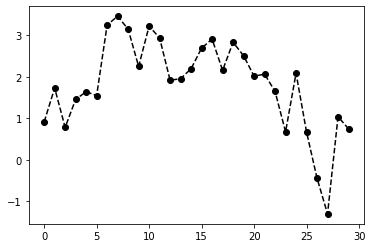

In [32]:
plt.plot(randn(30).cumsum(), color = 'k', linestyle = 'dashed', marker = 'o')

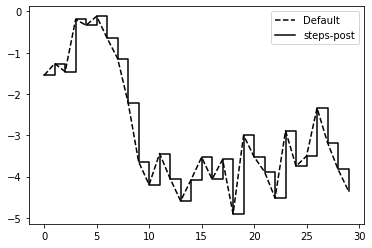

In [36]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label = 'Default')
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc='best')

### 눈금, 라벨, 범례

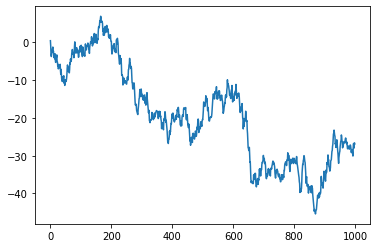

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
plt.show()

### ```.set_xticks()``` :  전체 데이터 범위를 따라 눈금을 어디에 배치할지 지정
### ```.set_xticklabels()``` : 눈금 이름을 지정할 때 사용

### ```.set_xlabel()``` : x 축 이름
### ```.set_title()``` : 그래프 제목

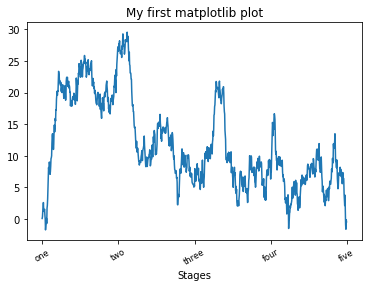

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation = 30, # 눈금자 회전 기울기
                            fontsize = 'small') # 눈금자 크기

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

plt.show()

### 범레 추가하기
1. 각 그래프에 label 인자를 넘기는 것

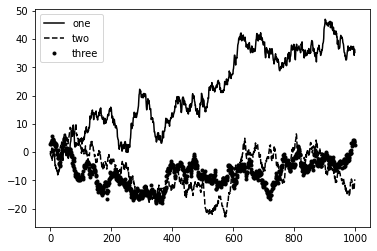

In [57]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'k--', label = 'two')
ax.plot(randn(1000).cumsum(), 'k.', label = 'three')
ax.legend(loc = 'best')
plt.show() # 범례 위치를 알아서 지정

### 주석과 그림 추가

### ```ax.annotate()``` : 그래프 상 추가

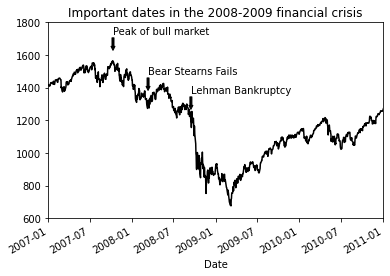

In [64]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']

spx.plot(ax = ax, style = 'k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date) + 75),
                xytext = (date, spx.asof(date) + 225),
                arrowprops = dict(facecolor='black', headwidth = 4, width = 2,
                                  headlength = 4),
                horizontalalignment = 'left', verticalalignment = 'top')

# Zoom in on 2007 - 2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')
plt.show()

### 도형 추가
### ```ax.add_patch(도형객체)```

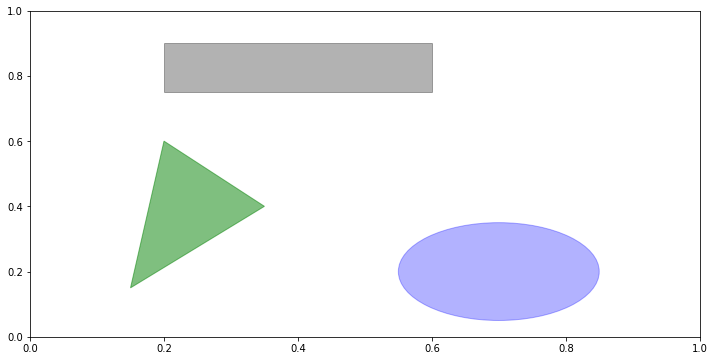

In [66]:
fig = plt.figure(figsize = (12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), # 꼭짓점 좌표
                     0.4, # 길이 
                     0.15, # 높이
                     color = 'k', alpha = 0.3)

circ = plt.Circle((0.7, 0.2), # 원 중심 좌표
                  0.15, 
                  color = 'b', alpha = 0.3)

pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], # 꼭짓점 좌표
                   color = 'g', alpha = 0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

### 그래프를 파일로 저장
### ```plt.savefig('figpath.pdf', dpi, bbox_inches)```
- ```fname``` : 파일 경로나 파이썬의 파일과 유사한 객체를 나타내는 문자열, 저장되는 포맷은 파일 확장자를 통해 결정 (pdf, png, svg, 'ps', 'eps', 등)
- ```dpi``` : 인치당 도트 해상도
- ```facecolor, edgecolor``` : 서브플롯 바깥 배경 색상
- ```format``` : 명시적 파일 포맷
- ```bbox_inches``` : figure에서 저장할 부분. 만약 'tight'를 저장하면 figurd 둘레의 비어있는 공간을 모두 제거

### 
### pandas에서 seaborn

### 선 그래프
### ```.plot()```

### ```Series.plot()```의 메서드 인자

|  |  |
| -- | -- |
| label | 그래프의 범례 이름 |
| ax | 그래프를 그릴 matplotlib의 서브플롯 객체 |
| style | 'ko--' 같은 스타일 문자열 |
| alpha | 그래프 투명도 (0 ~ 1) |
| kind | 그래프 종류 ('area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie') |
| logy | y축에 대한 로그 스케일링 |
| use_index | 객체의 색인을 눈금 이름으로 사용할지 여부 |
| rot | 눈금 이름을 로테이션 (0 ~ 360) |
| xticks | x축으로 사용할 값 |
| yticks | y축으로 사용할 값 |
| xlim | x축 한계 ([0, 10]) |
| ylim | y축 한계 |
| grid | 축의 그리드를 표시할지 여부 |

<AxesSubplot:>

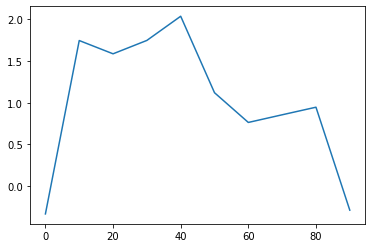

In [69]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s.plot()

### **데이터 프레임의 plot메서드는 자동적으로 범례 생성**
### ```DataFrame.plot()```의 메서드 인자

|  |  |
| -- | -- |
| subplots | 각 DataFrame의 컬럼을 독립된 서브플롯에 그림 |
| sharex | subplots = True 인 경우 x축을 공유하고 눈금과 한계를 연결 |
| sharey | subplots = True 인 경우 y축을 공유 |
| figsize | 생성될 그래프의 크기를 튜플로 지정 |
| title | 그래프의 제목을 문자열로 지정 |
| legend | 서브플롯의 범례를 추가  |
| sort_columns | 열을 알파벳 순서로 그린다. 기본값은 존재하는 열 순서 |

<AxesSubplot:>

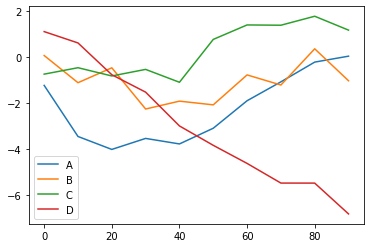

In [76]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns = ['A', 'B', 'C', 'D'],
                  index = np.arange(0, 100, 10))
df.plot()

### 
### 막대그래프

### ```data.plot.bar()``` : 막대그래프
### ```data.plot.barh()``` : 수평 막대그래프

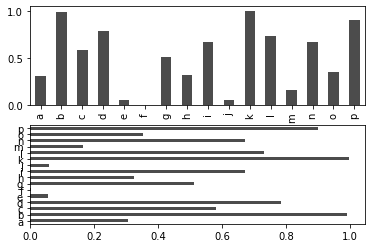

In [78]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)
data.plot.barh(ax = axes[1], color = 'k', alpha = 0.7)
plt.show()

### 
### 그룹별 각각의 막대 그래프

Genus         A         B         C         D
one    0.608051  0.585002  0.373850  0.334368
two    0.111570  0.967236  0.114473  0.188253
three  0.126599  0.916468  0.162025  0.477270
four   0.871247  0.540296  0.554962  0.112302
five   0.756065  0.487919  0.107486  0.501789
six    0.592879  0.756843  0.382219  0.578301


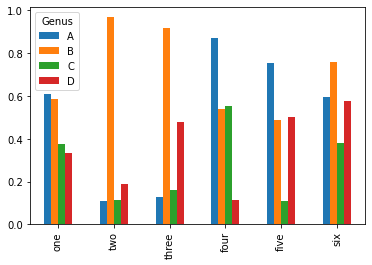

In [82]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index = ['one', 'two', 'three', 'four', 'five', 'six'],
                  columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))
print(df)
df.plot.bar()
plt.show()

### 
### 누적 막대 그래프
### ```stacked = True```옵션 사용

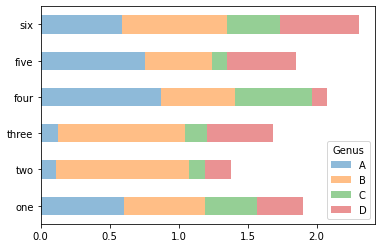

In [85]:
df.plot.barh(stacked = True, alpha = 0.5)
plt.show()

### 

In [86]:
tips = pd.read_csv('tips.csv')

In [93]:
tips.head(3)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3


### ```pd.crosstab(x, y)``` : x와 y의 교차분할표 생성

In [92]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [94]:
party_counts = party_counts.loc[:, 2:5]

####  각 행의 합이 1이 되도록 정규화
### ```.div(data.sum(1), axis = 'index')```

In [100]:
party_pcts = party_counts.div(party_counts.sum(1), axis = 'index')
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


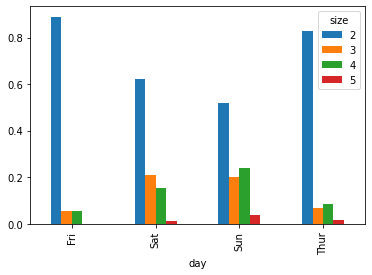

In [98]:
party_pcts.plot.bar()
plt.show()

### ```sns.barplot(x, y, data, orient, hue)```

In [104]:
import seaborn as sns

In [108]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head(3)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886


- day 열의 각 값에 대한 데이터는 tip_pct의 평균값으로 막대그래프를 생성
- 막대그래프 위에 덧그려진 검은 선은 95%의 신뢰구간

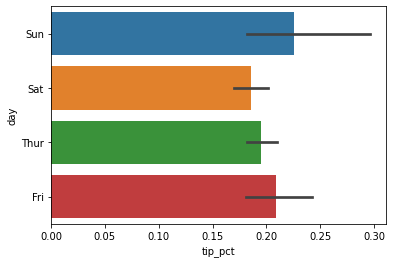

In [110]:
sns.barplot(x = 'tip_pct', y = 'day', data = tips, orient = 'h')
plt.show()

- hue 옵션을 이용하면 추가 분류에 따라 나눠 그림

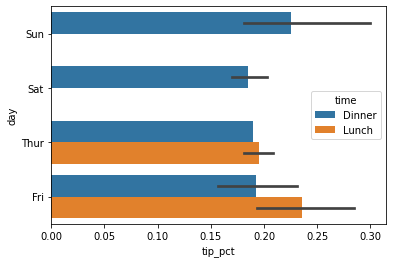

In [112]:
sns.barplot(x = 'tip_pct', y = 'day', hue = 'time', data = tips, orient = 'h')
plt.show()

**seaborn**라이브러리는 자동으로 기본 색상 팔레트, 그래프 배역, 그디드 선 색상 같은 꾸밈새를 변경
- ```sns.set```메서드를 이용해서 꾸밈새 변경 가능

In [113]:
sns.set(style = 'whitegrid')

### 
### 히스토그램, 밀도 그래프 (density plot)

### ```data.plot.hist(bins)```

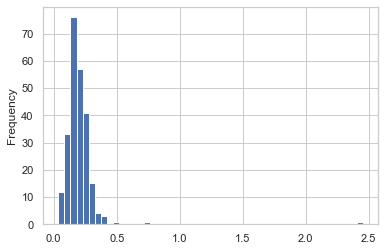

In [115]:
tips['tip_pct'].plot.hist(bins = 50); plt.show()

### ```data.plot.density()``` / ```data.plot.kde()```

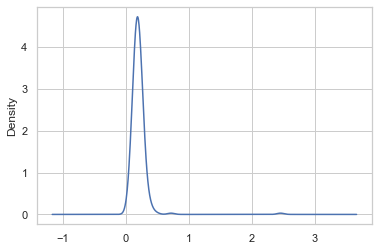

In [117]:
tips['tip_pct'].plot.density(); plt.show()
# tips['tip_pct'].plot.kde(); plt.show()

### ```sns.distplot(data, bins)``` : 히스토그램과 밀도 그래프를 한번에 그림

C:\Users\이찬솔\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


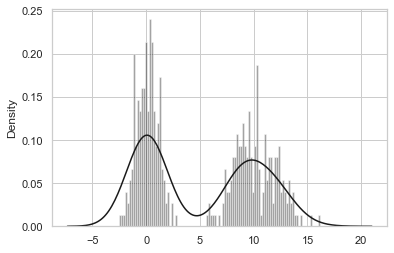

In [121]:
comp1 = np.random.normal(0, 1, size = 200)
comp2 = np.random.normal(10, 2, size = 200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins = 100, color = 'k') ; plt.show()

### 
### 산포도

In [125]:
macro = pd.read_csv('macrodata.csv')

In [126]:
macro.head(3)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09


In [128]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


### ```sns.regplot(x, y, data)``` : 산포도와 선형회귀곡선을 함꼐 그림

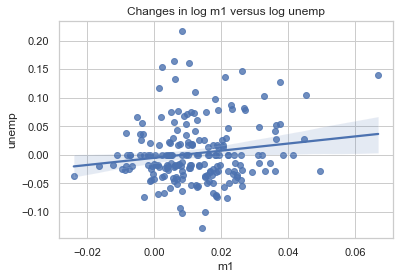

In [131]:
sns.regplot('m1', 'unemp', data = trans_data)
plt.title("Changes in log %s versus log %s" % ('m1', 'unemp')) ; plt.show()

### 
### ```sns.pairplot(data, diag_kine`, plot_kws)``` : 산포도 행렬
- ```diag_kws```  : 각각의 그래프에 전달할 개별 설정값 지정

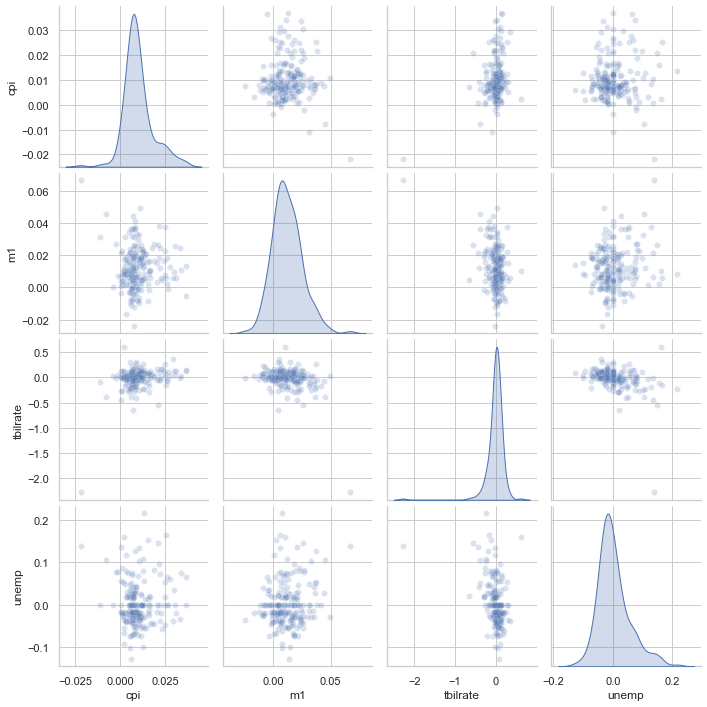

In [134]:
sns.pairplot(trans_data, diag_kind = 'kde', plot_kws = {'alpha': 0.2}) ; plt.show()

### 
### 패싯 그리드와 범주형 데이터
### ```sns.factorplot(x, y, hue, row, col, kind, data)``` : 범주형 변수 (row, col) 의, 범주별 그래프

- 범주형 변수 col = 'smoker'별 그래프

C:\Users\이찬솔\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


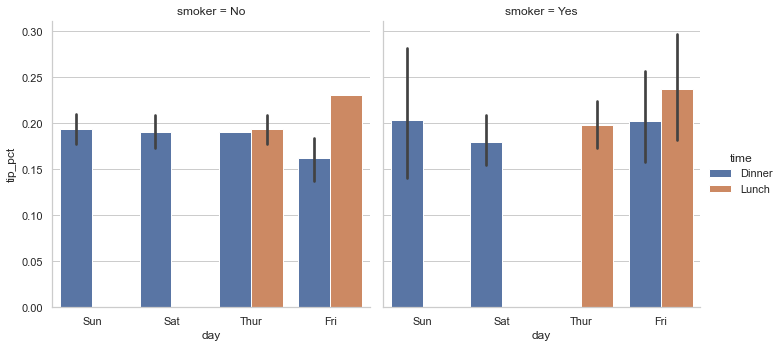

In [140]:
sns.factorplot(x = 'day', y = 'tip_pct', hue = 'time', 
               col = 'smoker', kind = 'bar', data = tips[tips.tip_pct < 1])
plt.show()

- 범주형 변수 (row = 'time', col = 'smoker')별 그래프

C:\Users\이찬솔\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


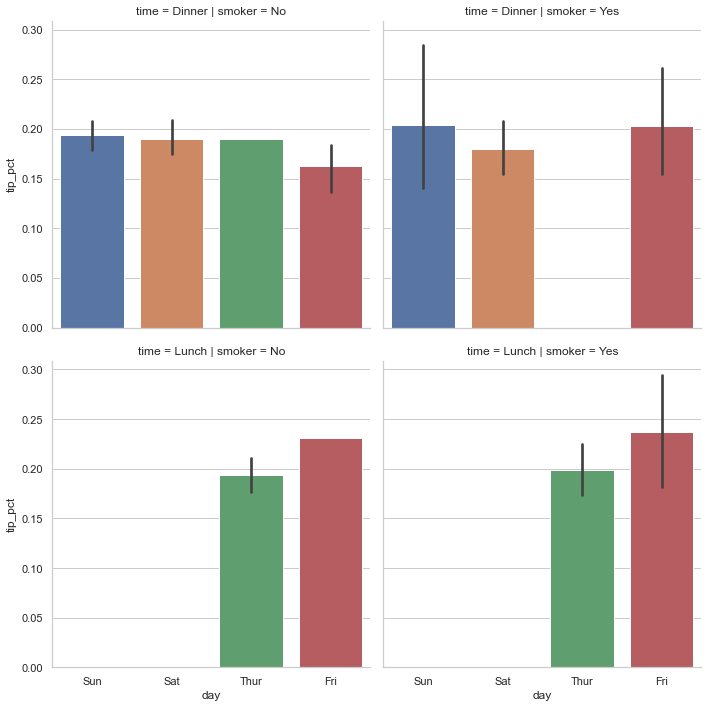

In [141]:
sns.factorplot(x = 'day', y = 'tip_pct', 
               row = 'time',
               col = 'smoker',
               kind = 'bar', data = tips[tips.tip_pct < 1])
plt.show()

C:\Users\이찬솔\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


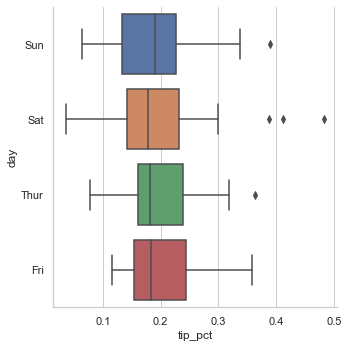

In [142]:
sns.factorplot(x = 'tip_pct', y = 'day', kind = 'box',
               data = tips[tips.tip_pct < 0.5])
plt.show()